In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(llpnanoaodschema)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples_2mu2e = [
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
]

In [3]:
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 max_files = 1,
                                )

In [4]:
runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    skipbadfiles=True
)

channels = [
    "baseNoLjNoLjsource", "baseNoLj"
]

p = sidm_processor.SidmProcessor(
    channels,
    # ["matched_jet_base", "fraction_base", "isolation_base", "energy_transfer_base", "muon_crosscleaning_base"],
    ["isolation_base"],
    unweighted_hist=False,
)

out = {}
for i, sample in enumerate(samples_2mu2e):

    # print(f"Processing {sample}")
    fileset_one_sample = {samples_2mu2e[i]:fileset_2mu2e.get(samples_2mu2e[i])}
    
    output = runner.run(fileset_one_sample, treename='Events', processor_instance=p)

    #Add this sample's output to the out variable
    out[sample] = output["out"][sample]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:285: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

Warning: Unable to apply all for nested dsaMuons collection. Skipping.... no field named 'good_matched_muons'

2Mu2E_1000GeV_0p25GeV_0p002mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


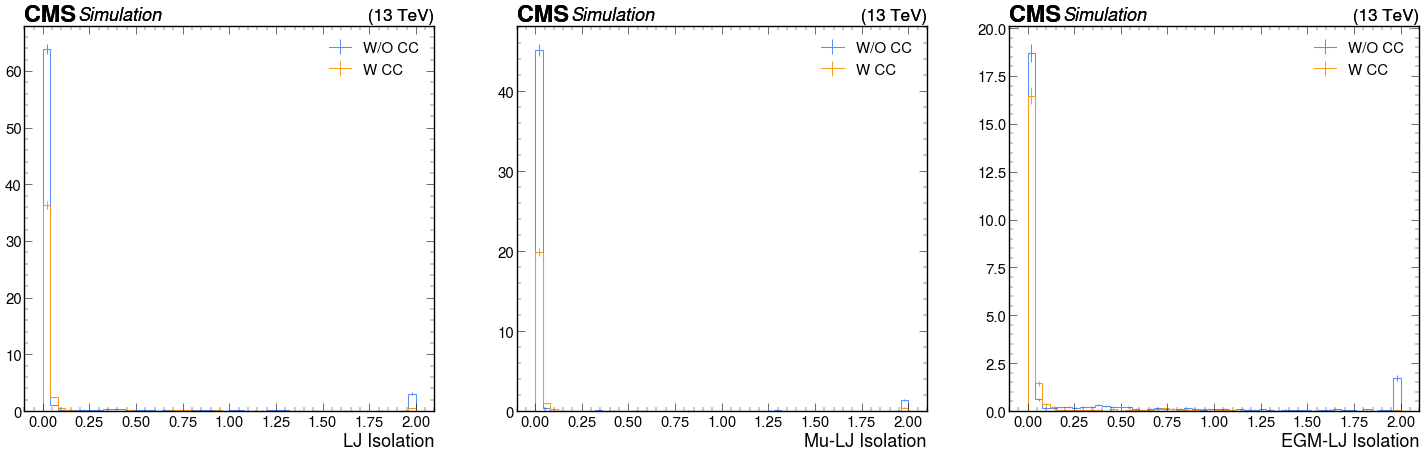

In [6]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=False, label='W/O CC')
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[1], :], density=False, label='W CC')
plt.legend()

plt.subplot(1,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=False, label='W/O CC')
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[1], :], density=False, label='W CC')
plt.legend()

plt.subplot(1,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=False, label='W/O CC')
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[1], :], density=False, label='W CC')
plt.legend()